# Data Cleaning
Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters.

## Step 1: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

## Step 2: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

## Step 3: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

## Step 4: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```

In [5]:
import pandas as pd

# Replace 'your_file_path' with the actual path to your CSV file
file_path = r'F:\Notes\Internship\Forage\BA_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now you can work with the 'df' DataFrame


In [6]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | First time flying British Ai...
1,1,Not Verified | I flew London to Cairo and ret...
2,2,Not Verified | Absolutely the worst experienc...
3,3,Not Verified | Flew back from Malta after sc...
4,4,Not Verified | Cabin luggage had to go to carg...
...,...,...
3683,3683,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3684,3684,LHR to HAM. Purser addresses all club passenge...
3685,3685,My son who had worked for British Airways urge...
3686,3686,London City-New York JFK via Shannon on A318 b...


In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df

,reviews
0,✅ Trip Verified | First time flying British Ai...
1,Not Verified | I flew London to Cairo and ret...
2,Not Verified | Absolutely the worst experienc...
3,Not Verified | Flew back from Malta after sc...
4,Not Verified | Cabin luggage had to go to carg...
...,...
3683,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3684,LHR to HAM. Purser addresses all club passenge...
3685,My son who had worked for British Airways urge...
3686,London City-New York JFK via Shannon on A318 b...


In [10]:
# Remove "Verified" or "Not Verified" labels if they exist at the beginning
df['reviews'] = df['reviews'].str.replace(r'^(?:✅ Trip Verified|Not Verified) \|', '', regex=True)

In [11]:
df.shape

(3688, 1)

In [12]:
import re

# Remove punctuation and non-alphanumeric characters
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '', regex=True)

In [13]:
# Remove extra spaces
df['reviews'] = df['reviews'].str.strip()

In [14]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,First time flying British Airways and I would ...,First time flying British Airways and I would ...
1,I flew London to Cairo and return in October 2...,I flew London to Cairo and return in October I...
2,Absolutely the worst experience ever Flew int...,Absolutely the worst experience ever Flew into...
3,Flew back from Malta after scattering our sons...,Flew back from Malta after scattering our sons...
4,Cabin luggage had to go to cargo even when I s...,Cabin luggage had to go to cargo even when I s...


In [15]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,First time flying British Airways and I would ...,First time flying British Airways and I would ...,"[(First, a), (time, n), (flying, v), (British,..."
1,I flew London to Cairo and return in October 2...,I flew London to Cairo and return in October I...,"[(flew, v), (London, n), (Cairo, n), (return, ..."
2,Absolutely the worst experience ever Flew int...,Absolutely the worst experience ever Flew into...,"[(Absolutely, r), (worst, a), (experience, n),..."
3,Flew back from Malta after scattering our sons...,Flew back from Malta after scattering our sons...,"[(Flew, n), (back, r), (Malta, n), (scattering..."
4,Cabin luggage had to go to cargo even when I s...,Cabin luggage had to go to cargo even when I s...,"[(Cabin, n), (luggage, n), (go, v), (cargo, v)..."


In [17]:
df

,reviews,Cleaned Reviews,POS tagged
0,First time flying British Airways and I would ...,First time flying British Airways and I would ...,"[(First, a), (time, n), (flying, v), (British,..."
1,I flew London to Cairo and return in October 2...,I flew London to Cairo and return in October I...,"[(flew, v), (London, n), (Cairo, n), (return, ..."
2,Absolutely the worst experience ever Flew int...,Absolutely the worst experience ever Flew into...,"[(Absolutely, r), (worst, a), (experience, n),..."
3,Flew back from Malta after scattering our sons...,Flew back from Malta after scattering our sons...,"[(Flew, n), (back, r), (Malta, n), (scattering..."
4,Cabin luggage had to go to cargo even when I s...,Cabin luggage had to go to cargo even when I s...,"[(Cabin, n), (luggage, n), (go, v), (cargo, v)..."
...,...,...,...
3683,LHRJFKLAXLHR Check in was ok apart from being ...,LHRJFKLAXLHR Check in was ok apart from being ...,"[(LHRJFKLAXLHR, n), (Check, n), (ok, a), (apar..."
3684,LHR to HAM Purser addresses all club passenger...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ..."
3685,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways..."
3686,London CityNew York JFK via Shannon on A318 bu...,London CityNew York JFK via Shannon on A but h...,"[(London, n), (CityNew, n), (York, n), (JFK, n..."


In [18]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,First time flying British Airways and I would ...,First time flying British Airways and I would ...,"[(First, a), (time, n), (flying, v), (British,...",First time fly British Airways would hesitat...
1,I flew London to Cairo and return in October 2...,I flew London to Cairo and return in October I...,"[(flew, v), (London, n), (Cairo, n), (return, ...",fly London Cairo return October basically pe...
2,Absolutely the worst experience ever Flew int...,Absolutely the worst experience ever Flew into...,"[(Absolutely, r), (worst, a), (experience, n),...",Absolutely bad experience ever Flew Heathrow...
3,Flew back from Malta after scattering our sons...,Flew back from Malta after scattering our sons...,"[(Flew, n), (back, r), (Malta, n), (scattering...",Flew back Malta scatter son ash favourite sp...
4,Cabin luggage had to go to cargo even when I s...,Cabin luggage had to go to cargo even when I s...,"[(Cabin, n), (luggage, n), (go, v), (cargo, v)...",Cabin luggage go cargo even say carry medici...


# Sentiment Analysis with Separate Columns

In this section, we perform sentiment analysis on the review data while creating separate columns to store both the sentiment value and sentiment label.

1. **Sentiment Analysis Function**: We define a function, `analyze_sentiment`, which takes a text as input, performs sentiment analysis, and returns both the sentiment value (a numeric score) and sentiment label (positive, negative, or neutral).

2. **Applying Sentiment Analysis**: We apply the `analyze_sentiment` function to the 'reviews' column in our DataFrame. The result is a new DataFrame with two additional columns: 'sentiment_value' and 'sentiment.'

3. **Result Explanation**: The 'sentiment_value' column contains a numeric sentiment score that represents the sentiment's intensity, while the 'sentiment' column stores the sentiment label (positive, negative, or neutral).

4. **Example Output**: The resulting DataFrame allows us to easily analyze and visualize the sentiment of each review, and it provides both a numeric and label representation of sentiment.

Let's proceed with the code and analysis.

In [28]:
# Assuming you have a DataFrame 'df' with a column 'reviews'
import textblob
from textblob import TextBlob
# Function to analyze sentiment and assign labels
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to your reviews and create a new column 'sentiment'
df['sentiment'] = df['Lemma'].apply(analyze_sentiment)

# Display the DataFrame with sentiment labels
print(df[['reviews', 'sentiment']])


                                                reviews sentiment
0     First time flying British Airways and I would ...  positive
1     I flew London to Cairo and return in October 2...  positive
2     Absolutely the worst experience ever  Flew int...  negative
3     Flew back from Malta after scattering our sons...  positive
4     Cabin luggage had to go to cargo even when I s...   neutral
...                                                 ...       ...
3683  LHRJFKLAXLHR Check in was ok apart from being ...  positive
3684  LHR to HAM Purser addresses all club passenger...  positive
3685  My son who had worked for British Airways urge...  positive
3686  London CityNew York JFK via Shannon on A318 bu...  positive
3687  SINLHR BA12 B747436 First Class Old aircraft 1...  negative

[3688 rows x 2 columns]


In [29]:
df

,reviews,Cleaned Reviews,POS tagged,Lemma,sentiment
0,First time flying British Airways and I would ...,First time flying British Airways and I would ...,"[(First, a), (time, n), (flying, v), (British,...",First time fly British Airways would hesitat...,positive
1,I flew London to Cairo and return in October 2...,I flew London to Cairo and return in October I...,"[(flew, v), (London, n), (Cairo, n), (return, ...",fly London Cairo return October basically pe...,positive
2,Absolutely the worst experience ever Flew int...,Absolutely the worst experience ever Flew into...,"[(Absolutely, r), (worst, a), (experience, n),...",Absolutely bad experience ever Flew Heathrow...,negative
3,Flew back from Malta after scattering our sons...,Flew back from Malta after scattering our sons...,"[(Flew, n), (back, r), (Malta, n), (scattering...",Flew back Malta scatter son ash favourite sp...,positive
4,Cabin luggage had to go to cargo even when I s...,Cabin luggage had to go to cargo even when I s...,"[(Cabin, n), (luggage, n), (go, v), (cargo, v)...",Cabin luggage go cargo even say carry medici...,neutral
...,...,...,...,...,...
3683,LHRJFKLAXLHR Check in was ok apart from being ...,LHRJFKLAXLHR Check in was ok apart from being ...,"[(LHRJFKLAXLHR, n), (Check, n), (ok, a), (apar...",LHRJFKLAXLHR Check ok apart snap early check...,positive
3684,LHR to HAM Purser addresses all club passenger...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ...",LHR HAM Purser address club passenger name b...,positive
3685,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways...",son work British Airways urge fly British Ai...,positive
3686,London CityNew York JFK via Shannon on A318 bu...,London CityNew York JFK via Shannon on A but h...,"[(London, n), (CityNew, n), (York, n), (JFK, n...",London CityNew York JFK via Shannon really n...,positive


In [30]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

positive    2765
negative     896
neutral       27
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1e5731b9b20>,
 [Text(-0.7771546196563442, 0.7784797345768246, 'positive'),
  Text(0.7590458598267991, -0.7961465836639604, 'negative'),
  Text(1.3496429513388308, -0.031046801790369304, 'neutral')],
 [Text(-0.42390251981255134, 0.424625309769177, '75.0%'),
  Text(0.4140250144509813, -0.4342617729076147, '24.3%'),
  Text(0.8497751915837082, -0.019547986312454746, '0.7%')])

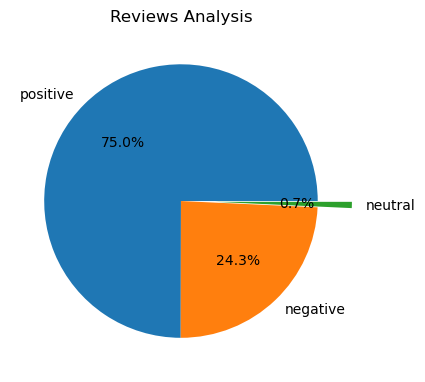

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(sentiment_counts.values, labels = sentiment_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

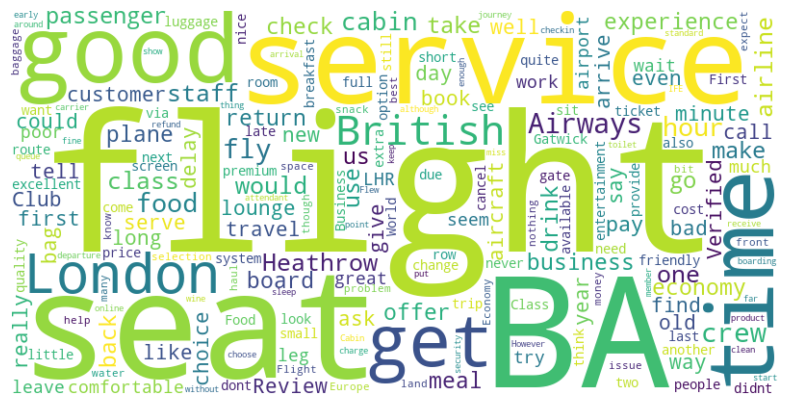

In [32]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


reviews = df['Lemma']

# Tokenize the reviews into words
words = ' '.join(reviews).split()

# Calculate word frequencies
word_freq = Counter(words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

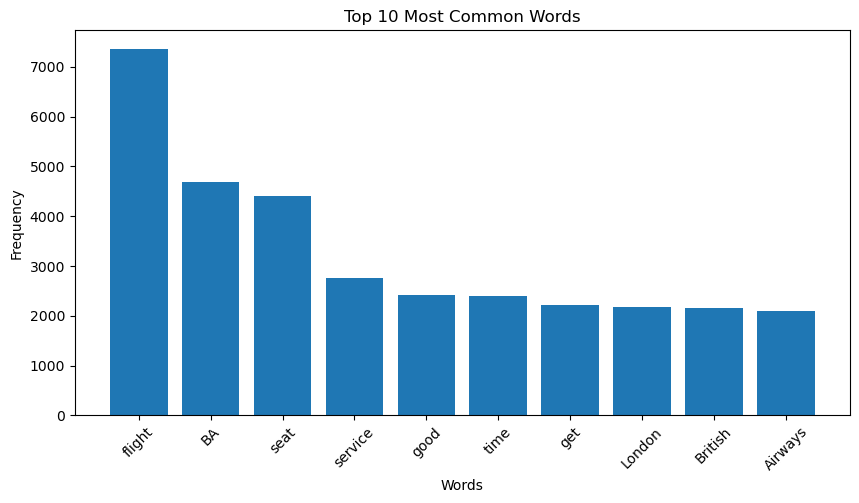

In [27]:
# Optionally, you can also create a bar chart for the top N frequent words
top_n = 10
most_common_words = word_freq.most_common(top_n)
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Words')
plt.xticks(rotation=45)
plt.show()